In [ ]:
!pip install adversarial-robustness-toolbox
from keras.models import load_model
import os

import matplotlib.pyplot as plt


from art.attacks.evasion import UniversalPerturbation
from art.estimators.classification import KerasClassifier
from art.utils import compute_success

     |████████████████████████████████| 655kB 5.9MB/s 
     |████████████████████████████████| 20.8MB 1.6MB/s 
     |████████████████████████████████| 235kB 39.3MB/s 
     |████████████████████████████████| 7.1MB 41.4MB/s 
     |████████████████████████████████| 747kB 37.7MB/s 
ERROR: chainer 6.5.0 has requirement typing-extensions<=3.6.6, but you'll have typing-extensions 3.7.4.2 which is incompatible.
  Found existing installation: typing-extensions 3.6.6
    Uninstalling typing-extensions-3.6.6:
      Successfully uninstalled typing-extensions-3.6.6
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:

save_dir = '/content/drive/My Drive/model'
model_name = 'keras_cifar10_trained_model.h5'
model_path = os.path.join(save_dir, model_name)

model = load_model(model_path)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
import random
import keras

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print("Done loading data")

Done loading data


In [ ]:
# %%capture


# classifier = KerasClassifier(model)
# universal_attack = UniversalPerturbation(classifier, attacker='deepfool',
#                                          attacker_params={'max_iter':1}, 
#                                          norm=np.inf, max_iter=2, eps=0.1)
# print("Start")
# universal_pert = universal_attack.generate(x_train,y_train)


In [ ]:
%%capture

classifier = KerasClassifier(model=model, clip_values=(0, 1), use_logits=False)
universal_attack = UniversalPerturbation(classifier=classifier, eps=0.1, delta=0.2, 
                               max_iter=1, norm=np.inf,
                               attacker='deepfool', 
                               attacker_params={'max_iter':1})
universal_pert = universal_attack.generate(x_train,y_train)

In [ ]:

# print(universal_pert.shape)
# pred_pert = classifier.predict(universal_pert)
acc = compute_success(classifier, x_train, y_train, universal_pert, targeted=False)
print(f"Attack Misclassification fraction {acc}")
# plt.imshow(universal_attack.noise[0])

Attack Misclassification fraction 0.5971


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 32, 32, 3)


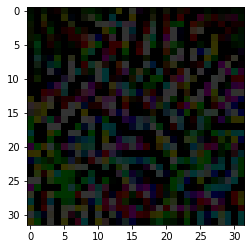

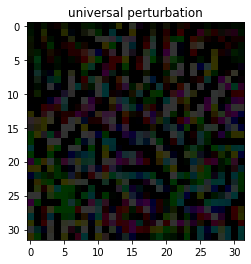

In [ ]:
import matplotlib
# matplotlib.image.imsave('/content/drive/My Drive/universal_2_np.png')
print(universal_attack.noise.shape)
plt.imshow(universal_attack.noise[0]*2)
fi,ax1=plt.subplots(1,1)
ax1.set_title("universal perturbation")
ax1.imshow(universal_attack.noise[0]*2)
fi.savefig('/content/drive/My Drive/universal_2.png')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True Label truck and predicted label frog
True Label airplane and predicted label deer


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True Label cat and predicted label cat
True Label airplane and predicted label deer


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


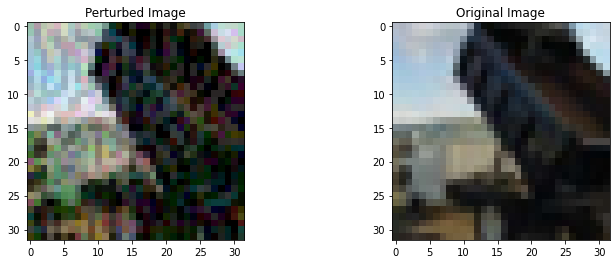

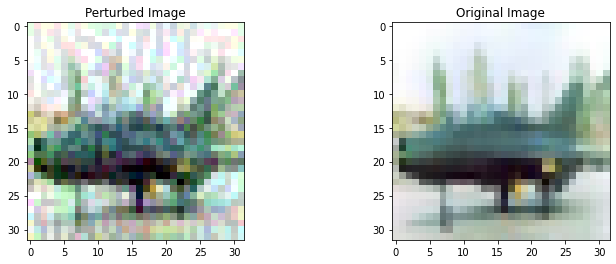

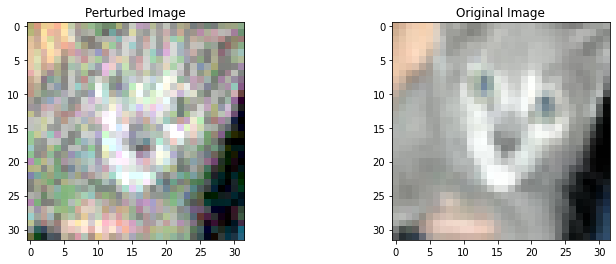

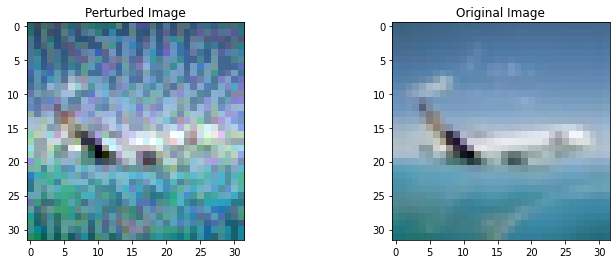

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# universal_perturbation = plt.imread('/content/drive/My Drive/universal_65.png')
np.random.seed(2)
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
indx = np.random.choice(range(50000), size=4)
noise = universal_attack.noise[0]
for i in indx:
  img = x_train[i]
  noisy_img = img + noise
  pred = classifier.predict([noisy_img])
  pred_label = np.argmax(pred)
  true_label = y_train[i][0]
  print(f"True Label {class_labels[true_label]} and predicted label {class_labels[pred_label]}")
  fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
  ax1.set_title("Perturbed Image")
  ax1.imshow(noisy_img)
  ax2.set_title("Original Image")
  ax2.imshow(img)
  fig.savefig(f'/content/drive/My Drive/universal_pert_og_{i}_true{class_labels[true_label]}_pred{class_labels[pred_label]}.png')
plt.show()

True Label frog and predicted label frog
True Label frog and predicted label frog
True Label airplane and predicted label frog
True Label deer and predicted label frog


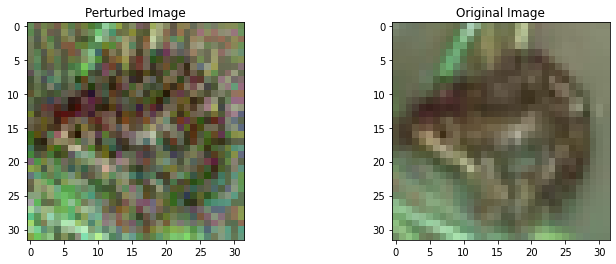

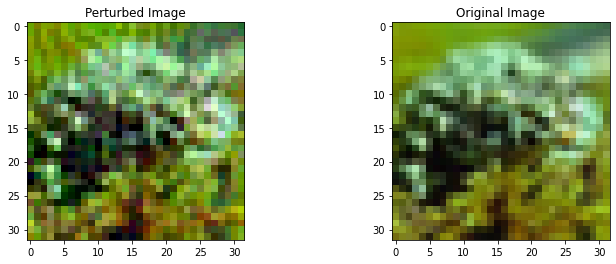

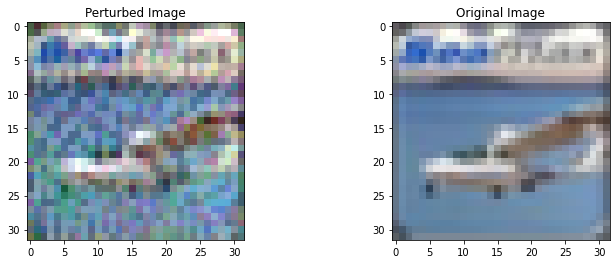

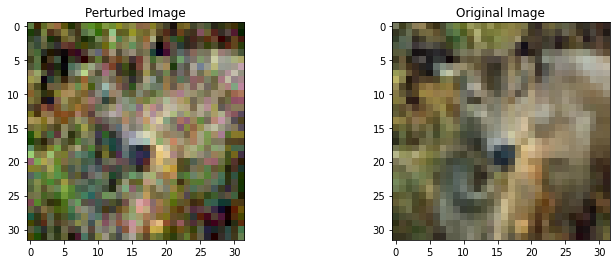

In [ ]:
np.random.seed(24)
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
indx = np.random.choice(range(50000), size=4)
for i in indx:
  pred = classifier.predict([universal_pert[i]])
  pred_label = np.argmax(pred)
  true_label = y_train[i][0]
  print(f"True Label {class_labels[true_label]} and predicted label {class_labels[pred_label]}")
  fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
  ax1.set_title("Perturbed Image")
  ax1.imshow(universal_pert[i])
  ax2.set_title("Original Image")
  ax2.imshow(x_train[i])
  fig.savefig(f'/content/drive/My Drive/universal_pert_og_{i}_true{class_labels[true_label]}_pred{class_labels[pred_label]}.png')
plt.show()